In [ ]:
#subir archivo csv a collab
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
#Lectura del Archivo CSV

import pandas as pd
import numpy as np

# Cargar dataset
df = pd.read_csv("StudentsPerformance.csv")

df= df.rename(columns={
    'gender': 'Género',
    'race/ethnicity': 'Grupo_Etnico',
    'parental level of education': 'Educación_Parental',
    'lunch': 'Tipo_Almuerzo',
    'test preparation course': 'Curso_Preparación',
    'math score': 'Puntaje_Matemáticas',
    'reading score': 'Puntaje_Lectura',
    'writing score': 'Puntaje_Escritura'
})

In [ ]:
df

,Género,Grupo_Etnico,Educación_Parental,Tipo_Almuerzo,Curso_Preparación,Puntaje_Matemáticas,Puntaje_Lectura,Puntaje_Escritura
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


                     Puntaje_Matemáticas  Puntaje_Lectura  Puntaje_Escritura
Puntaje_Matemáticas             1.000000         0.817580           0.802642
Puntaje_Lectura                 0.817580         1.000000           0.954598
Puntaje_Escritura               0.802642         0.954598           1.000000


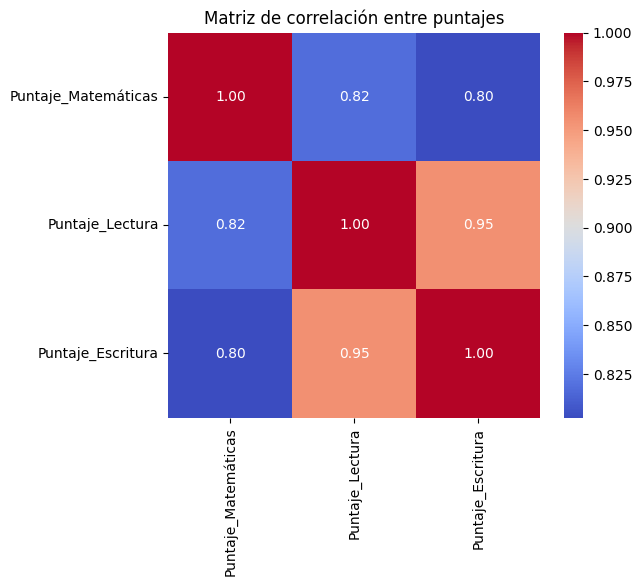

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las tres variables numéricas
variables_numericas = ['Puntaje_Matemáticas', 'Puntaje_Lectura', 'Puntaje_Escritura']
corr_matrix = df[variables_numericas].corr()

print(corr_matrix)

# Visualizar con heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre puntajes')
plt.show()

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Variable dependiente y explicativa
X = df[['Puntaje_Escritura']]
y = df['Puntaje_Matemáticas']

# Agregar constante (intercepto) para el modelo
X_const = sm.add_constant(X)
modelo = sm.OLS(y, X_const).fit()

# Mostrar resumen del modelo
print(modelo.summary())

# Predicción y residuos
df['Prediccion'] = modelo.predict(X_const) #cálculo de los valores predichos y crea una columna llamada predicción
df['Residuos'] = y - df['Prediccion'] # Calcula y guarda los residuos en una columna llamada residuos

                             OLS Regression Results                            
Dep. Variable:     Puntaje_Matemáticas   R-squared:                       0.644
Model:                             OLS   Adj. R-squared:                  0.644
Method:                  Least Squares   F-statistic:                     1807.
Date:                 Fri, 11 Jul 2025   Prob (F-statistic):          3.38e-226
Time:                         00:34:05   Log-Likelihood:                -3620.6
No. Observations:                 1000   AIC:                             7245.
Df Residuals:                      998   BIC:                             7255.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.5831

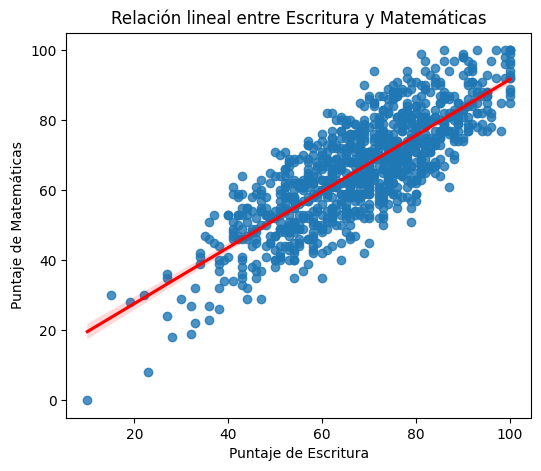

In [ ]:
plt.figure(figsize=(6,5))
sns.regplot(x=df['Puntaje_Escritura'], y=df['Puntaje_Matemáticas'], line_kws={'color': 'red'})
plt.title("Relación lineal entre Escritura y Matemáticas")
plt.xlabel("Puntaje de Escritura")
plt.ylabel("Puntaje de Matemáticas")
plt.show()

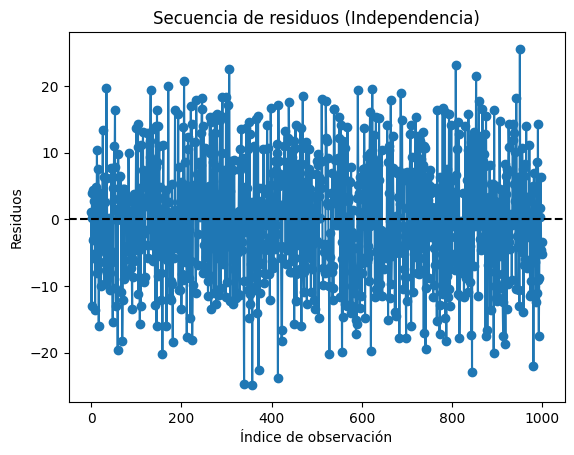

In [ ]:
plt.plot(df['Residuos'], marker='o')
plt.axhline(0, linestyle='--', color='black')
plt.title("Secuencia de residuos (Independencia)")
plt.xlabel("Índice de observación")
plt.ylabel("Residuos")
plt.show()



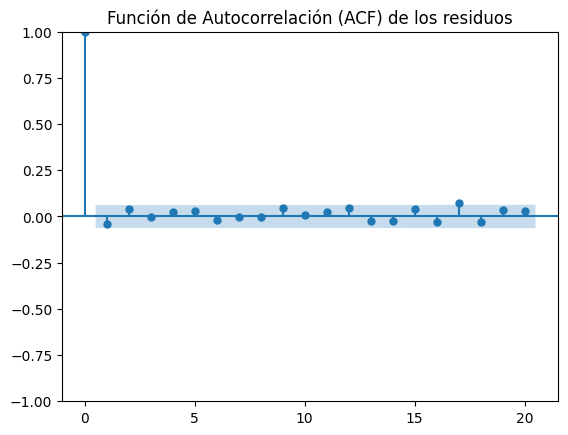

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(df['Residuos'], lags=20, alpha=0.05)
plt.title('Función de Autocorrelación (ACF) de los residuos')
plt.show()


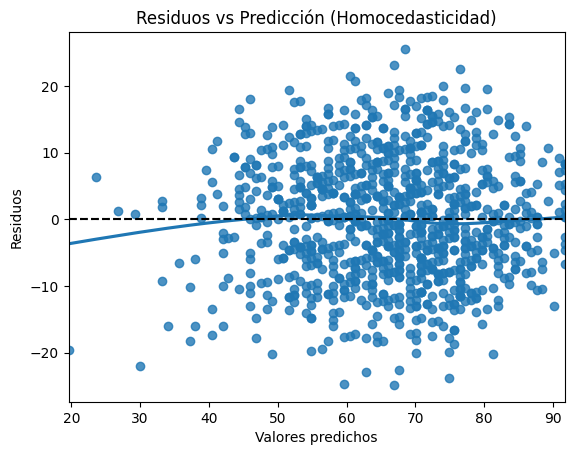

In [ ]:
sns.residplot(x=df['Prediccion'], y=df['Residuos'], lowess=True)#Línea suave
plt.axhline(0, linestyle='--', color='black')
plt.title("Residuos vs Predicción (Homocedasticidad)")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.show()

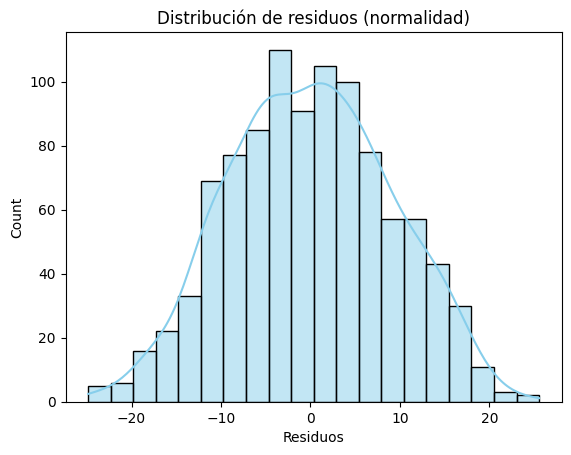

In [ ]:
sns.histplot(df['Residuos'], kde=True, color='skyblue')
plt.title("Distribución de residuos (normalidad)")
plt.xlabel("Residuos")
plt.show()